# Titanic Analysis Kibo 2

## Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings(action='ignore')

## Data Input

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [78]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(df_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Data Dictionary
<hr>

- PassengerID : 승객ID
- Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- Sex : male = 남성, female = 여성
- Age : 나이
- SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
- Parch : 타이타닉 호에 동승한 부모 / 자식의 수
- Ticket : 티켓 번호
- Fare : 승객 요금
- Cabin : 방 호수
- Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
- Survived : 0 = 사망, 1 = 생존 -> 우리가 예측할 Target 변수 Only Train Data에만 있다.

In [6]:
# 데이터 살펴보기
print('train data shape: ', df_train.shape)
print('test data shape: ', df_test.shape)
print()
print('----------[train infomation]----------')
print(df_train.info())
print()
print('----------[test infomation]----------')
print(df_test.info())

train data shape:  (891, 12)
test data shape:  (418, 11)

----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

----------[test infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns)

# EDA
<hr>

In [7]:
# train 데이터 결측값
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# test 데이터 결측값
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# train 데이터 describe
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_train.describe(include=['O']) #범주형 데이터 확인

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


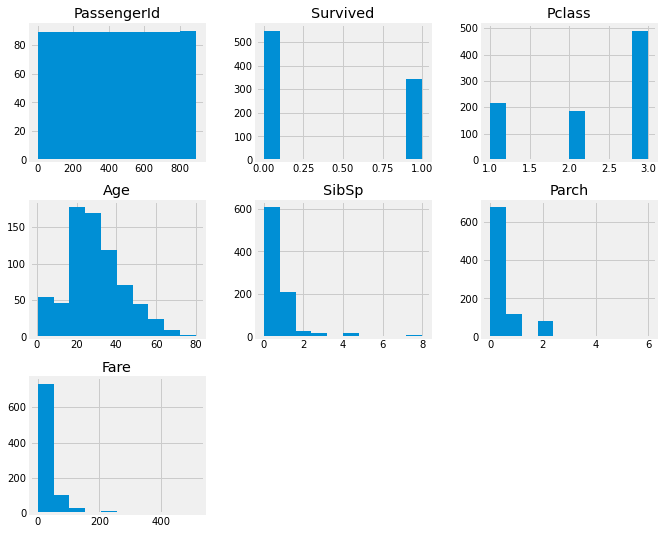

In [11]:
df_train.hist(figsize = (10,9))
plt.show()

- Survived : 0 아니면 1 생존 아니면 사망.
- Pclass : 1,2,3등급 객실. 수치형이지만 거의 범주형. 3등급이 가장 많다.
- Age : 2-30대가 가장 많다. 나이가 많을수록 수가 줄어드는 게 보임
- Sibsp : 형제자매 0~1명이 가장 많다.
- Parch : 부모자식도 0~1명이 가장 많다.
- Fare : 낮은 금액이 가장 많고 높은 금액은 별로 없음

In [12]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
df_test.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [14]:
# 시각화를 위한 파이차트 함수 생성
def pie_chart(feature) : 
    feature_ratio = df_train[feature].value_counts(sort = False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = df_train[df_train['Survived'] == 1][feature].value_counts()
    dead = df_train[df_train['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect = 'auto')
    plt.pie(feature_ratio, labels = feature_index, autopct = '%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()
    
    for i, index in enumerate(feature_index) :
        plt.subplot(1, feature_size + 1, i+1 , aspect = 'equal')
        plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], 
                 autopct = '%1.1f%%')
        plt.title(str(index) + '\'s ratio')
        
    plt.show()

## Sex

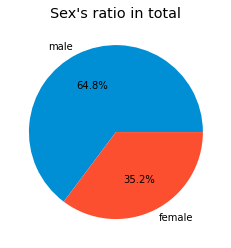

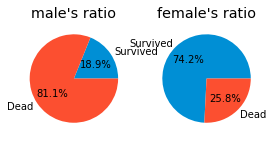

In [15]:
pie_chart('Sex') # 성별 파이차트

- 전체적으로 남자가 여자보다 많다 
- 전체적인 비율을 고려한다고 해도 생존자는 여자가 훨씬 많이 생존했다.

## PClass

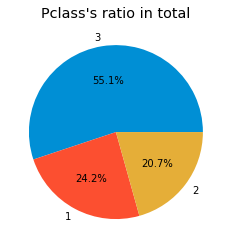

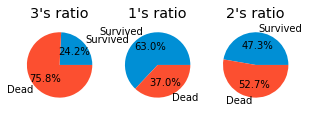

In [16]:
# Class 좌석등급별
pie_chart('Pclass')

- 전체적으로 3등급이 절반정도 차지하나, 죽은 비율이 3등급이 다른 등급보다 월등하다.

## Embarked

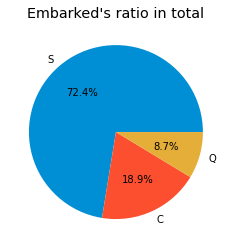

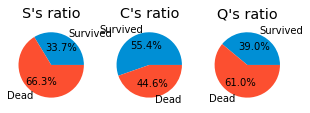

In [17]:
# 승선한 장소
pie_chart('Embarked')

- S에서 승선한 인원이 72% 로 가장 많고, 죽은 인원 비율도 66%로 가장 많다.
- C에서 승선한 인원은 20%정도. 반절은 살아남고 반절은 죽었다.
- Q에서 승선한 인원은 가장 적고, 61%로 비율상으로 꽤나 많이 죽었다.

## SibSp (동반한 형제자매)

In [18]:
def pie_chart(feature) : 
    feature_ratio = df_train[feature].value_counts(sort = False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = df_train[df_train['Survived'] == 1][feature].value_counts()
    dead = df_train[df_train['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect = 'auto')
    plt.pie(feature_ratio, labels = feature_index, autopct = '%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()

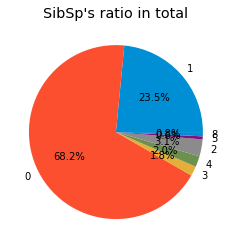

In [19]:
pie_chart('SibSp') # 성별 파이차트

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


Text(0.5, 0, 'SibSp')

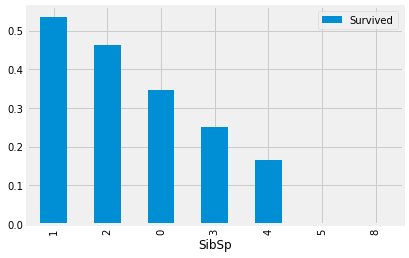

In [20]:
# 동반한 형제자매 생존
sbs = df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived',
                                                                                             ascending = False)
# SibSp 로 살아남은 비율을 그룹화하는 코드, 많이 Survived 한 순으로 정렬했다.

#이후 시각화
print(sbs)
sbs.plot("SibSp", kind = 'bar').set_xlabel("SibSp")

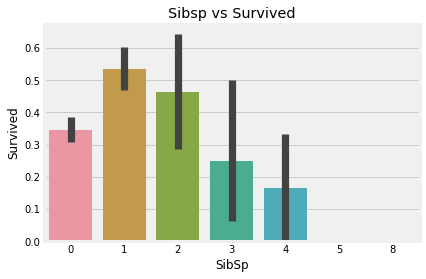

In [21]:
# Bar차트와 Factor차트로 가족이 있는 사람들의 생존율을 확인해본다.
a = sns.barplot('SibSp', "Survived", data = df_train)
a.set_title("Sibsp vs Survived")
plt.show()

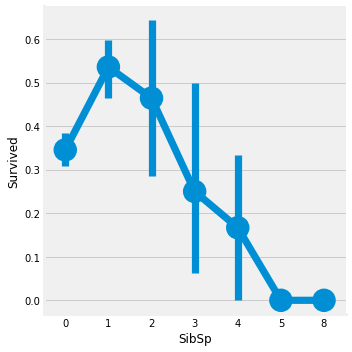

In [22]:
# Factor plot
factor = sns.factorplot("SibSp", 'Survived', data = df_train)
plt.show()

- 형제자매가 0명인 비율이 가장 많다. 근데 0명인 사람은 1,2명보다 생존률이 낮았음.
아마 사람이 많아서 그런 거 아닐까 ..?
- 0명을 제외하고는 형제자매가 많을수록 생존확률이 줄어드는 것이 보인다.
- 형제자매가 없는 사람들(0그룹)은 35% 정도의 생존률을 보인다.
- 1명의 형제자매를 가진 그룹이 가장 많이 살아남았다.

## Parch

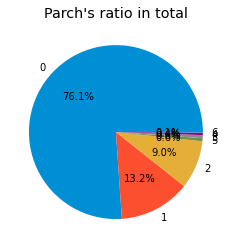

In [23]:
pie_chart('Parch')

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


Text(0.5, 0, 'Parch')

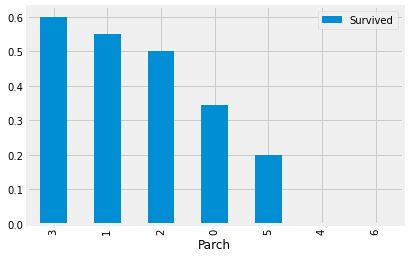

In [24]:
par = df_train[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)
                                                                                                    
print(par)
par.plot("Parch", kind = 'bar').set_xlabel("Parch")                                                                                            

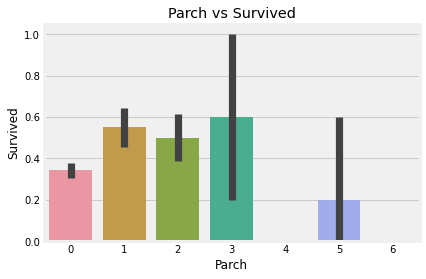

In [25]:
a = sns.barplot('Parch', 'Survived', data = df_train)
a.set_title("Parch vs Survived")
plt.show()

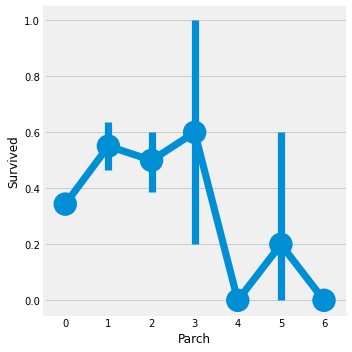

In [26]:
sns.factorplot('Parch', 'Survived', data = df_train)
plt.show()

- 마찬가지로 0명인 사람들의 비율이 가장 많다.
- 부모자식 3명일 때 가장 많이 살아남았다. 근데 이건 전체에서의 너무 비율이 작아서..
- 3,1,2,0,5순으로 많이 살아남았음

## Age

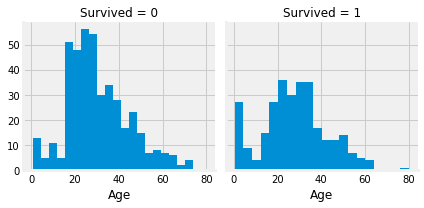

In [27]:
# 생존자 나이
g = sns.FacetGrid(df_train, col = 'Survived') #패싯 그래프로 생존,사망의 나이 비율을 살펴본다.
g.map(plt.hist, 'Age', bins=20) # 나이 비율을 본다. bins 는 20

- 사망자는 20-30대가 가장 많다. (앞에서 나이 비율을 보았을 때도 그냥 수가 많았음)
- 생존자 비율은 생김새가 사망자 비율이랑 비슷비슷하나 영유아나 어린애들(0세-10세까지)의 생존 비율이 월등하다. 

## 다중변수들 비교

### 나이 & 객실 등급 결합

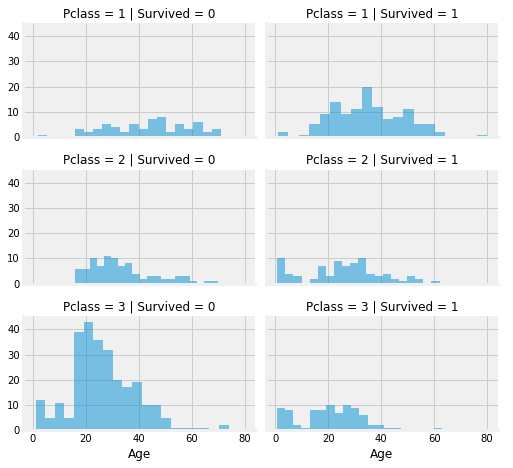

In [28]:
# 1:1 다중 변수 비교. 나이와 객실 등급을 결합하여 FacetGrid를 통해 살펴본다.
grid = sns.FacetGrid(df_train, col = 'Survived', row = 'Pclass', size= 2.2, aspect =1.6) 
#크기, 가로세로 비율 조정
grid.map(plt.hist, 'Age', alpha= .5 , bins = 20) #투명도도 주고 ..
grid.add_legend();

- Pclass1 : 살아남은 비율이 훨씬 많다. 연령대별 골고루 살아남은 것 같다. 
- Pcalss2 : 비슷비슷하다 그러나 역시 나이가 어린 승객의 생존비율이 높다. 
- pclass3 : 죽은 비율이 훨씬 많다. 나이 차트랑 비슷하게 생긴 걸 봐서 나이 안가리고 다양하게 죽었음. <br> 어린 승객도 사망자 비율이 꽤나 된다. <br> 그러나 역시 생존자들을 보면 어린사람들의 비율이 높음

- pclass1, 2는 나이가 많은 손님이 pclass보다 더 많은 것 같다. 웬만해선 나이가 많으면 돈이 더 많을테니 .. (시대배경상)
<br><br>
class와 요금비교가 필요할 것 같다.

### 객실 & 성별 결합

In [29]:
# CrossTab을 사용하여 객실과 성별에 대해서 생존자 수를 확인해본다.
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins = True).style.background_gradient(cmap='Blues')

- 여자 : 총 사망자수 81, 생존자수 233, 3등급 가장 많이 사망. 1등급 가장 많이 생존. <br>
그러나 대체로 생존 
<br><br>
- 남자 : 총 사망자수 468, 생존자수 109, 마찬가지로 3등급 가장 많이 사망. <br>
1,3등급 많이 생존했으나 그저 3등급 사람이 많아서 그런 것 같고 2배가 넘는 사람 수를 고려했을 때 비율상으로 1등급이 가장 많이 생존한 것과 다름이 없음.

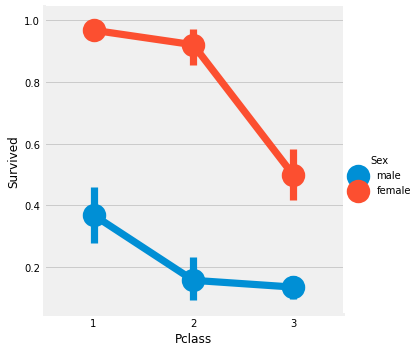

In [30]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train)

### 요금, 성별, 승선 항(Embarked) 비교

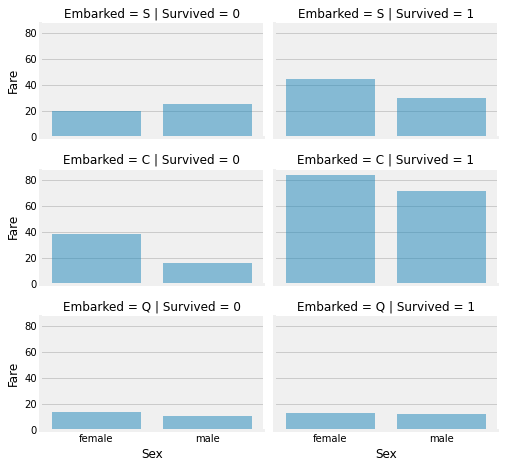

In [31]:
# 요금, 성별, 승선항 비교
# 요금의 Central Tendency (평균, 최빈값, 중앙값 등)을 나타낸다.
grid = sns.FacetGrid(df_train, row = 'Embarked', col='Survived', size = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = .5, ci = None)
grid.add_legend()

- Embarked S : 마찬가지로 여자가 더 많이 살아남았다. 가장 많은 승객이 탑승했었는데 요금은 그냥 그렇게 높지 않음. 평범한 도시인듯
- Embarked C : 압도적으로 요금이 높은 것을 확인할 수 있음. 부촌 예상. 많이 살아나았을듯.
- Embarked Q : 부촌은 아닌 듯. 요금이 꽤나 낮다. 비슷비슷한 비율. 위에서 살펴보았을 때도 탑승객의 비율이 매우 적었음
<br><br>
승선항과 요금비교도 필요할 것 같다.
<br><br>
여자가 요금을 대체로 더 많이 냄. 그래서 많이 살았나.

## Pclass & Age , Sex & Age 비율 살펴보기

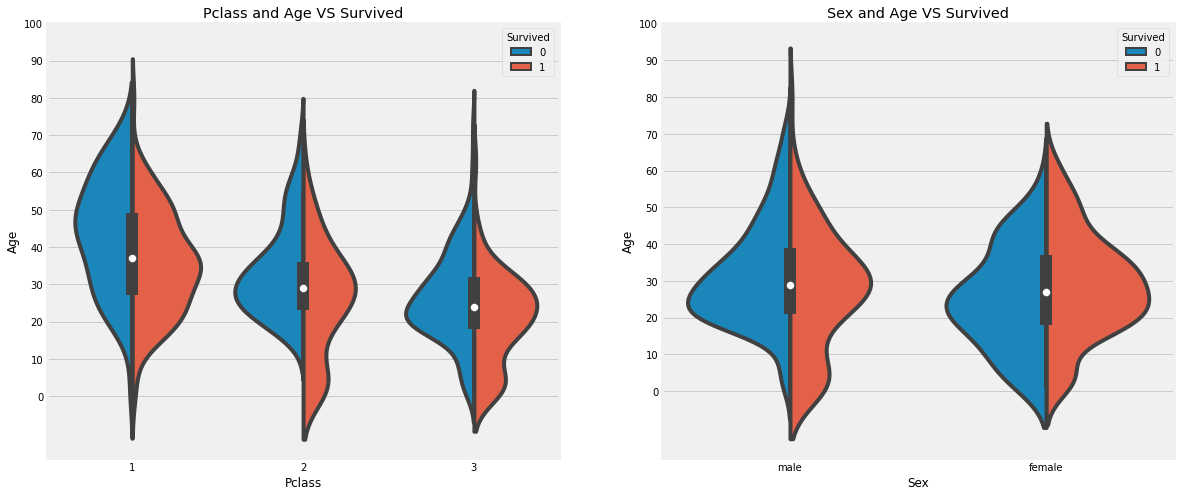

In [77]:
# 바이올린 플롯으로 객실과 나이에 대한 생존자 비율, 성별과 나이에 대한 생존자 비율을 살펴본다.
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=df_train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=df_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## Fare & Pclass 요금과 객실 비교

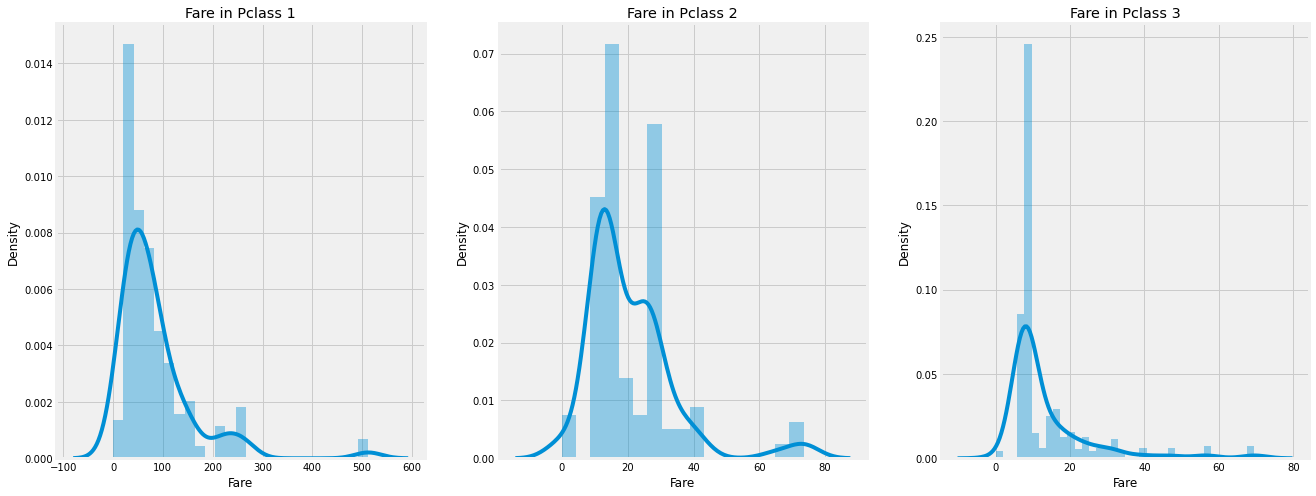

In [32]:
f, ax = plt.subplots(1,3,figsize = (20,8))

sns.distplot(df_train[df_train['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title("Fare in Pclass 1")

sns.distplot(df_train[df_train['Pclass'] ==2].Fare, ax=ax[1])
ax[1].set_title("Fare in Pclass 2")

sns.distplot(df_train[df_train['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title("Fare in Pclass 3")

plt.show()

- Pclass1 : 요금이 확실히 높은 구간이 많다. 애초에 x축 값들부터가 다름.. 
- Pclass2 : 1등급만큼은 아니지만 그래도 3등급보다 요금이 높다.
- Pclass3 : 요금이 제일 낮다.

## Pclass & Embarked 비교

<AxesSubplot:>

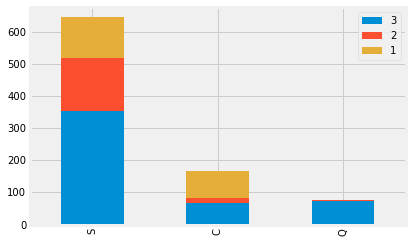

In [34]:
S = df_train[df_train['Embarked'] == "S"]["Pclass"].value_counts()
C = df_train[df_train['Embarked'] == "C"]['Pclass'].value_counts()
Q = df_train[df_train['Embarked'] == "Q"]["Pclass"].value_counts()
df = pd.DataFrame([S,C,Q])
df.index = ['S','C','Q']
df.plot(kind = 'bar', stacked = True)

- S : 1,2,3등급 구별없이 많이 탔음
- C : 역시 부촌이었다. 1등급이 많이 탔음
- Q : 그냥 사람이 없는 곳인 것 같다.

## Heatmap

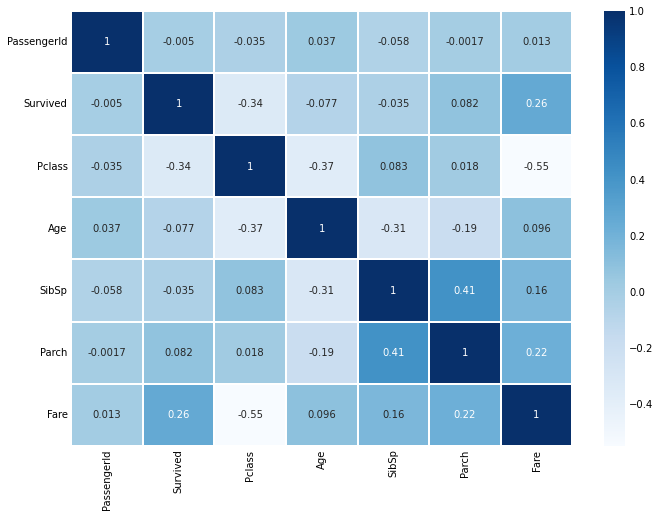

In [35]:
sns.heatmap(df_train.corr(), annot = True, cmap = 'Blues', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

그렇게 높은 상관관계들은 보이지 않는다.

# 데이터 전처리

<hr>

In [36]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 필요없는 변수 제거

In [38]:
print ("Before", df_train.shape, df_test.shape)

train = df_train.drop(['Ticket', 'Cabin'], axis=1)
test = df_test.drop(['Ticket', 'Cabin'], axis = 1)
combine = [train, test] # 한 번에 처리를 위해 combine.

print ("After", train.shape, test.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


 ### 이름 Title 구분 
 Miss, Mr ..등등

In [39]:
for dataset in combine :
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    # 정규표현식 사용하여 추출
    
print(pd.crosstab(train['Title'], train['Sex'])) #이름별 성별 확인

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [40]:
for dataset in combine :
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', \
                    'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Others') 
    # 몇 개 없는건 Others 로 바꾸어주었다.
    
    dataset['Title'] = dataset['Title'].replace("Mlle","Miss")
    dataset['Title'] = dataset['Title'].replace('Ms',"Miss")
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs') 
    # 불어식 표현을 바꾸어준다.
    
print(train[['Title','Survived']].groupby(['Title'], as_index = False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4  Others  0.347826


여자 Title들이 생존확률이 더 높은 것을 확인할 수 있다.

In [41]:
# Title Mapping
title_mapping = {'Mr':1, 'Miss':2, "Mrs":3, "Master":4, "Others":5}
for dataset in combine :
    dataset['Title'] = dataset["Title"].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Title  
0      0   7.2500        S      1  
1      0  71.2833        C      3  
2      0   7.9250        S      2  
3      0  53.1000        S      3  
4      0   8.0500        S      1  


In [42]:
train.head() # 매핑이 잘 되었는 지 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [43]:
train = train.drop(['Name', 'PassengerId'], axis=1) # 필요없는 column 들 Drop
test = test.drop(['Name', 'PassengerId'], axis=1)
combine = [train, test]

print(train.shape, test.shape) # test에는 target 칼럼이 없으므로 1개 적은 것이 맞다.

(891, 9) (418, 8)


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


### 성별

In [45]:
# 성별 원핫인코딩
for dataset in combine :
    dataset['Sex'] = dataset['Sex'].map( {'female' : 1, 'male' : 0}).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [46]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

#### Age는 분포가 좀 치우쳐서 평균으로 하기 좀 그러니까 중앙값으로 .

In [47]:
train['Age'].median()

28.0

In [48]:
train["Age"] = train["Age"].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 59.3+ KB


#### Embarked 는 그냥 최빈값으로 결측값 대체, 수치화도 해주기

In [49]:
freq_port = train.Embarked.dropna().mode()[0]
for dataset in combine :
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    # 수치화도 해주기
    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
 8   Title     891 non-null    int64  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


#### AgeBand 로 나이 나누어주기

In [79]:
# AgeBand 나누어주기 
train['AgeBand'] = pd.cut(train['Age'],5) # 5개 그룹으로 나누기
print(train[['AgeBand','Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', 
                                                                                    ascending = True))

KeyError: 'Age'

In [51]:
# 위에서 나눠진 AgeBand 대로 묶기
for dataset in combine :
    dataset.loc[dataset['Age'] <=16, 'Age_Band'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age_Band'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age_Band'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age_Band'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age_Band'] = 4
train = train.drop(['AgeBand'], axis  = 1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Band
0,0,3,0,22.0,1,0,7.2500,0,1,1.0
1,1,1,1,38.0,1,0,71.2833,1,3,2.0
2,1,3,1,26.0,0,0,7.9250,0,2,1.0
3,1,1,1,35.0,1,0,53.1000,0,3,2.0
4,0,3,0,35.0,0,0,8.0500,0,1,2.0


In [52]:
# Age 다시 한 번 확인하기
train['Age_Band'].value_counts().to_frame().style.background_gradient(cmap='Blues')
# 16-32세가 인원수가 가장 많다.

,Age_Band
1.000000,523
2.000000,188
0.000000,100
3.000000,69
4.000000,11


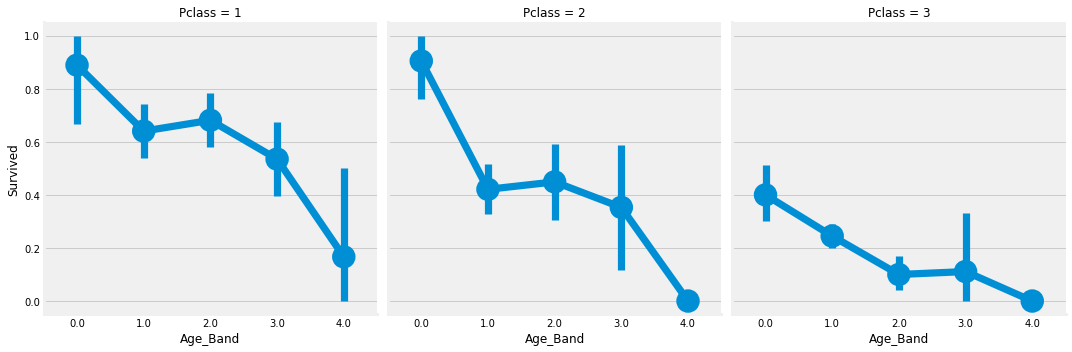

In [53]:
# Factorplot으로 Age_Band와 생존률확인하기 
sns.factorplot('Age_Band','Survived',data=train,col='Pclass')
plt.show()
# 애기들이 많이 살아남았다. 

#### Age * Pclass 인위변수 생성
Age , Pclass 는 수가 작을수록 더 많이 살아남기 때문에 묶어주었다.

In [54]:
# Age * Pclass 인위변수 생성
for dataset in combine :
    dataset['Age*Class'] = dataset.Age_Band * dataset.Pclass
    
train.loc[:, ['Age*Class', 'Age_Band','Age','Pclass']].head()

,Age*Class,Age_Band,Age,Pclass
0,3.0,1.0,22.0,3
1,2.0,2.0,38.0,1
2,3.0,1.0,26.0,3
3,2.0,2.0,35.0,1
4,6.0,2.0,35.0,3


#### 가족수. 혼자인지 아닌지

In [55]:
for dataset in combine :
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
                                                    # 자기자신을 포함해야 하므로 +1
train[['FamilySize','Survived']].groupby(['FamilySize'],
                        as_index = False).mean().sort_values(by = 'Survived', ascending = False).head()
                                                                           

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538


In [56]:
for dataset in combine :
    dataset['Alone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Alone'] = 1
    
train[['Alone', 'Survived']].groupby(['Alone'], as_index = False).mean().head()

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [57]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Band,Age*Class,FamilySize,Alone
0,0,3,0,22.0,1,0,7.2500,0,1,1.0,3.0,2,0
1,1,1,1,38.0,1,0,71.2833,1,3,2.0,2.0,2,0
2,1,3,1,26.0,0,0,7.9250,0,2,1.0,3.0,1,1
3,1,1,1,35.0,1,0,53.1000,0,3,2.0,2.0,2,0
4,0,3,0,35.0,0,0,8.0500,0,1,2.0,6.0,1,1


In [58]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Band,Age*Class,FamilySize,Alone
0,3,0,34.5,0,0,7.8292,2,1,2.0,6.0,1,1
1,3,1,47.0,1,0,7.0000,0,3,2.0,6.0,2,0
2,2,0,62.0,0,0,9.6875,2,1,3.0,6.0,1,1
3,3,0,27.0,0,0,8.6625,0,1,1.0,3.0,1,1
4,3,1,22.0,1,1,12.2875,0,3,1.0,3.0,3,0


혼자인 경우 생존률이 더 낮은 것을 보인다. (Alone = True)

#### Fare (요금)을 FareBand 로 묶기

In [59]:
# test에는 Fare 가 Null값이 하나 있다.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int32  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked    418 non-null    int32  
 7   Title       418 non-null    int64  
 8   Age_Band    418 non-null    float64
 9   Age*Class   418 non-null    float64
 10  FamilySize  418 non-null    int64  
 11  Alone       418 non-null    int64  
dtypes: float64(4), int32(2), int64(6)
memory usage: 36.0 KB


In [60]:
# 중앙값으로 대충 매워주자
test['Fare'].fillna(test['Fare'].dropna().median(), inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int32  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked    418 non-null    int32  
 7   Title       418 non-null    int64  
 8   Age_Band    418 non-null    float64
 9   Age*Class   418 non-null    float64
 10  FamilySize  418 non-null    int64  
 11  Alone       418 non-null    int64  
dtypes: float64(4), int32(2), int64(6)
memory usage: 36.0 KB


In [61]:
# 변수 정리
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
combine = [train,test]

In [62]:
train['FareBand'] = pd.qcut(train['Fare'], 4) # 4개..정도로 묶자
train[['FareBand','Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by='FareBand',ascending = True).head()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [63]:
for dataset in combine :
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare_Band'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare_Band'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare_Band'] = 2
    dataset.loc[(dataset['Fare'] > 31), 'Fare_Band'] = 3
    dataset['Fare_Band'] = dataset['Fare_Band'].astype(int)
    
train = train.drop(['FareBand'], axis= 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_Band,Age*Class,Alone,Fare_Band
0,0,3,0,22.0,7.2500,0,1,1.0,3.0,0,0
1,1,1,1,38.0,71.2833,1,3,2.0,2.0,0,3
2,1,3,1,26.0,7.9250,0,2,1.0,3.0,1,1
3,1,1,1,35.0,53.1000,0,3,2.0,2.0,0,3
4,0,3,0,35.0,8.0500,0,1,2.0,6.0,1,1


In [64]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Age_Band,Age*Class,Alone,Fare_Band
0,3,0,34.5,7.8292,2,1,2.0,6.0,1,0
1,3,1,47.0,7.0000,0,3,2.0,6.0,0,0
2,2,0,62.0,9.6875,2,1,3.0,6.0,1,1
3,3,0,27.0,8.6625,0,1,1.0,3.0,1,1
4,3,1,22.0,12.2875,0,3,1.0,3.0,0,1


#### 모델링 전 변수정리 , 확인

In [65]:
train = train.drop(['Age'], axis= 1)
train = train.drop(['Fare'], axis=1)
test = test.drop(['Age'], axis= 1)
test = test.drop(['Fare'], axis = 1)

In [66]:
train.head()

,Survived,Pclass,Sex,Embarked,Title,Age_Band,Age*Class,Alone,Fare_Band
0,0,3,0,0,1,1.0,3.0,0,0
1,1,1,1,1,3,2.0,2.0,0,3
2,1,3,1,0,2,1.0,3.0,1,1
3,1,1,1,0,3,2.0,2.0,0,3
4,0,3,0,0,1,2.0,6.0,1,1


In [67]:
test.head()

,Pclass,Sex,Embarked,Title,Age_Band,Age*Class,Alone,Fare_Band
0,3,0,2,1,2.0,6.0,1,0
1,3,1,0,3,2.0,6.0,0,0
2,2,0,2,1,3.0,6.0,1,1
3,3,0,0,1,1.0,3.0,1,1
4,3,1,0,3,1.0,3.0,0,1


In [68]:
# One-Hot Encoding for categorical variabels
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.copy()

# Modeling
<hr>
분류 모델들을 사용해서 모델링을 했다.<br>
<br>
사용한 모델들<br>

- Logistic Regression 로지스틱 회귀
- Support Vector Machine SVM
- KNeighborsClassifier KNN
- RandomForestClassifier
- Naive Bayes - GaussianNB

In [69]:
# Machine Learning Library Import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [70]:
# 정렬되어 있으므로 함 섞어준다.
train_data, train_label = shuffle(train_data , train_label, random_state = 5)

In [71]:
def train_and_test(model) :
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [72]:
train_data

,Pclass,Sex,Embarked,Title,Age_Band,Age*Class,Alone,Fare_Band
126,3,0,2,1,1.0,3.0,1,0
354,3,0,1,1,1.0,3.0,1,0
590,3,0,0,1,2.0,6.0,1,0
509,3,0,0,1,1.0,3.0,1,3
769,3,0,0,1,1.0,3.0,1,1
...,...,...,...,...,...,...,...,...
400,3,0,0,1,2.0,6.0,1,1
118,1,0,1,1,1.0,1.0,0,3
701,1,0,0,1,2.0,2.0,1,2
206,3,0,0,1,1.0,3.0,0,2


In [73]:
train_label

126    0
354    0
590    0
509    1
769    0
      ..
400    1
118    0
701    1
206    0
867    0
Name: Survived, Length: 891, dtype: int64

In [74]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
# KNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# RandomForest
rf_pred = train_and_test(RandomForestClassifier(n_estimators = 100))
# GaussianNB
nb_pred = train_and_test(GaussianNB())

Accuracy :  80.58 %
Accuracy :  82.94 %
Accuracy :  83.84 %
Accuracy :  86.87 %
Accuracy :  76.77 %


랜덤 포레스트 모델이 86.87% 의 정확도를 보였으므로 해당 모델 채택하여 제출

In [75]:
# Submission
submission = pd.DataFrame({"PassengerId" : df_test['PassengerId'], "Survived":rf_pred})

submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [76]:
# submission.to_csv("submission_rf.csv", index = False)

<hr>

## Essemble